<a href="https://colab.research.google.com/github/Sumaira-willis/Activity-2/blob/main/Assignment_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests

# Example: Alice in Wonderland (Project Gutenberg ID: 11)
url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url)
text = response.text.lower()

print(text[:500])  # preview first 500 characters




*** start of the project gutenberg ebook 11 ***

[illustration]




alice’s adventures in wonderland

by lewis carroll

the millennium fulcrum edition 3.0

contents

 chapter i.     down the rabbit-hole
 chapter ii.    the pool of tears
 chapter iii.   a caucus-race and a long tale
 chapter iv.    the rabbit sends in a little bill
 chapter v.     advice from a caterpillar
 chapter vi.    pig and pepper
 chapter vii.   a mad tea-party
 chapter viii.  the queen’s croquet-ground
 chapter ix.    the


In [6]:
# ============================
# 1. Import Libraries
# ============================
import requests
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import matplotlib.pyplot as plt



In [7]:
# ============================
# 2. Download Dataset (Project Gutenberg)
# Example: Alice in Wonderland (ID: 11)
# ============================
url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url)
text = response.text.lower()

print("Dataset length (characters):", len(text))
print("Preview:\n", text[:500])


Dataset length (characters): 144696
Preview:
 *** start of the project gutenberg ebook 11 ***

[illustration]




alice’s adventures in wonderland

by lewis carroll

the millennium fulcrum edition 3.0

contents

 chapter i.     down the rabbit-hole
 chapter ii.    the pool of tears
 chapter iii.   a caucus-race and a long tale
 chapter iv.    the rabbit sends in a little bill
 chapter v.     advice from a caterpillar
 chapter vi.    pig and pepper
 chapter vii.   a mad tea-party
 chapter viii.  the queen’s croquet-ground
 chapter ix.    the


In [8]:
# ============================
# 3. Tokenization & Sequence Preparation
# ============================
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in text.split("\n"):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

In [9]:
# Pad sequences
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

print("Vocabulary size:", total_words)
print("Max sequence length:", max_seq_len)

Vocabulary size: 3067
Max sequence length: 18


In [10]:
# ============================
# 4. Build Model (LSTM-based)
# ============================
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 64, input_length=max_seq_len-1),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# ============================
# 5. Train Model
# ============================
history = model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.0561 - loss: 6.4685
Epoch 2/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.0783 - loss: 5.8035
Epoch 3/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.1011 - loss: 5.4814
Epoch 4/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.1214 - loss: 5.2090
Epoch 5/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.1526 - loss: 4.9438
Epoch 6/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.1727 - loss: 4.7302
Epoch 7/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.1812 - loss: 4.5463
Epoch 8/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.1965 - loss: 4.3582
Epoch 9/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.2064 - loss: 4.2120
Epoch 10/10
790/790 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.2236 - loss: 4.0472


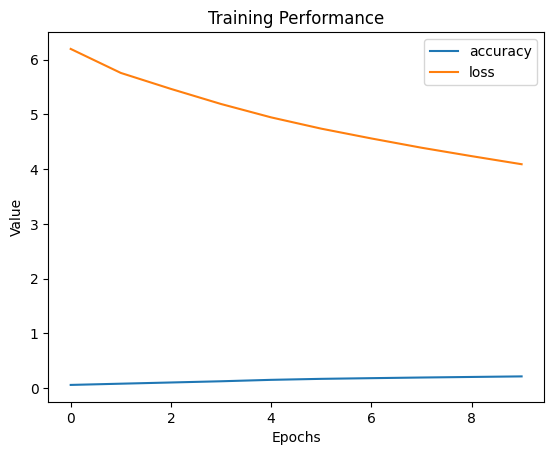

In [12]:
# ============================
# 6. Plot Training Accuracy
# ============================
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.title("Training Performance")
plt.show()

In [13]:
# ============================
# 7. Text Generation Function
# ============================
def generate_text(seed_text, next_words=20):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)[0]
        output_word = tokenizer.index_word.get(predicted, "")
        seed_text += " " + output_word
    return seed_text

In [15]:
def generate_text(seed_text, next_words=20, temperature=1.0):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        preds = model.predict(token_list)[0]
        preds = np.log(preds + 1e-8) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        predicted = np.random.choice(range(total_words), p=preds)
        output_word = tokenizer.index_word.get(predicted, "")
        seed_text += " " + output_word
    return seed_text


In [17]:
# ============================
# 8. Demo Application
# ============================
print("\nGenerated Example:\n")
print(generate_text("once upon a time", next_words=30))


Generated Example:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [18]:
# Second seed input example
print("\nGenerated Story (Seed: 'the rabbit was late'):\n")
print(generate_text("the rabbit was late"))



Generated Story (Seed: 'the rabbit was late'):

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
the rabbit was late turning to make some bit and a solemn bat and longed with hearts more either sorts of the cattle as
